In [12]:
import time

In [26]:
print(X_train[0,0])
x1 = time.time()
z = 0
k = 75
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
print(k , flush = True)
# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
print(np.mean(y_pred == y_test))
x2 = time.time()
print((x2 - x1) , " sec" , x1)

0
75
0.6684670713120672
393.8483853340149  sec 1683736335.1247063


In [1]:
import numpy as np
import pandas as pd
import itertools
import nltk
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
avis_df = pd.read_csv('data_preprocess_sans_stopwords.csv')
details_df = pd.read_csv('details.csv')
infos_scrapping_df = pd.read_csv('infos_scrapping.csv')
jeux_df = pd.read_csv('jeux.csv')

In [3]:
cv = CountVectorizer()
avis_df['comment'] = avis_df['comment'].fillna('')
bow = cv.fit_transform(avis_df['comment'])

In [4]:
y = avis_df["note"]

# transform the note column into a binary classification target variable
y_binary = np.where(y > 7, 1, -1)

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bow, y_binary, test_size=0.2, random_state=42)

In [27]:
# Find the best value of K
k_values = np.arange(1, 100, 2)  # Range of K values to try
accuracy_scores = []

In [29]:
for k in k_values:
    # Train the K-Nearest Neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(k , flush = True)
    # Predict the labels of the test set
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy of the classifier
    accuracy = np.mean(y_pred == y_test)
    accuracy_scores.append(accuracy)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


In [30]:
# Find the best K based on the accuracy scores
best_k = k_values[np.argmax(accuracy_scores)]

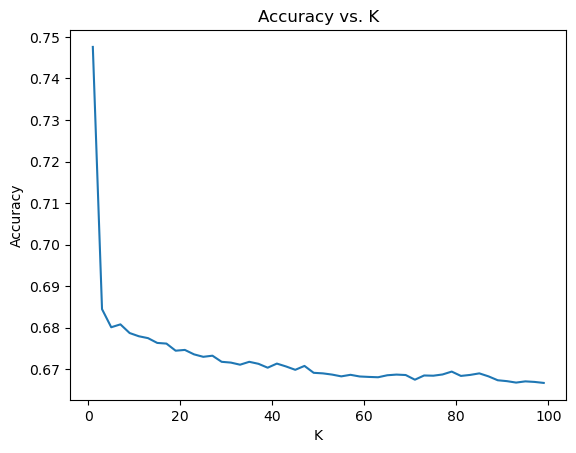

In [31]:
# Plot the accuracy scores
plt.plot(k_values, accuracy_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
plt.show()

In [35]:
# Initialize the CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

AttributeError: lower not found

In [32]:
# Train the K-Nearest Neighbors classifier with the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
svd = TruncatedSVD(n_components=2)
X_train_pca = svd.fit_transform(X_train_counts)
X_test_pca = svd.transform(X_test_counts)

In [33]:
# Apply dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_counts.toarray())
X_test_tsne = tsne.transform(X_test_counts.toarray())

NameError: name 'X_train_counts' is not defined

In [ ]:
# Plot the decision boundary
# Note: This code assumes that the data is 2-dimensional for visualization purposes
if X_train.shape[1] == 2:
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_train_tsne[:, 0].min() - 1, X_train_tsne[:, 0].max() + 1
    y_min, y_max = X_train_tsne[:, 1].min() - 1, X_train_tsne[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot the decision boundary
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

In [ ]:
# Predict the labels of the test set using the best K
y_pred = best_knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)